# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization

# **Train Data**

In [2]:
Train_Data = pd.read_csv ('C:/Users/Ruchit/Project/project-1/project1/TRAIN 1/train.csv')
Train_Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# **Data Cleaning**

In [3]:
Train_Data.shape

(550068, 12)

In [4]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
Train_Data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
Train_Data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
Train_Data[['Product_Category_2','Product_Category_3']].isnull().mean()

Product_Category_2    0.315666
Product_Category_3    0.696727
dtype: float64

In [8]:
Train_Data['Product_Category_2']=Train_Data['Product_Category_2'].fillna(Train_Data['Product_Category_2'].value_counts().index[0])
Train_Data['Product_Category_3']=Train_Data['Product_Category_3'].fillna(Train_Data['Product_Category_3']).value_counts().index[0]

In [9]:
Train_Data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
Train_Data.drop('User_ID',axis=1,inplace=True)
Train_Data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,16.0,15200
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [11]:
Train_Data.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.0,550068.000000
mean,8.076707,0.409653,5.404270,9.260768,16.0,9263.968713
std,6.522660,0.491770,3.936211,4.294093,0.0,5023.065394
min,0.000000,0.000000,1.000000,2.000000,16.0,12.000000
25%,2.000000,0.000000,1.000000,8.000000,16.0,5823.000000
50%,7.000000,0.000000,5.000000,8.000000,16.0,8047.000000
75%,14.000000,1.000000,8.000000,14.000000,16.0,12054.000000
max,20.000000,1.000000,20.000000,18.000000,16.0,23961.000000


In [12]:
pd.crosstab(index=[Train_Data['Age'],Train_Data['Gender'],Train_Data['City_Category']],columns=[Train_Data['Purchase'].max()])

col_0                       23961
Age   Gender City_Category       
0-17  F      A               1447
             B               1565
             C               2071
      M      A               1097
             B               3870
             C               5052
18-25 F      A               6269
             B              11686
             C               6673
      M      A              21266
             B              31561
             C              22205
26-35 F      A              17491
             B              21437
             C              11824
      M      A              56254
             B              70147
             C              42434
36-45 F      A               7105
             B              11110
             C               8955
      M      A              19512
             B              36488
             C              26843
46-50 F      A               1250
             B               6404
             C               5545
      M      A               6357
             B              14002
             C              12143
51-55 F      A               1778
             B               4243
             C               3873
      M      A               4321
             B              13498
             C              10788
55+   F      A                364
             B               1351
             C               3368
      M      A               3209
             B               3811
             C               9401

# **Data Visualization**

In [13]:
Train_Data.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [14]:
dscr_columns=[u'Gender',u'Age',u'City_Category',u'Stay_In_Current_City_Years']

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\li

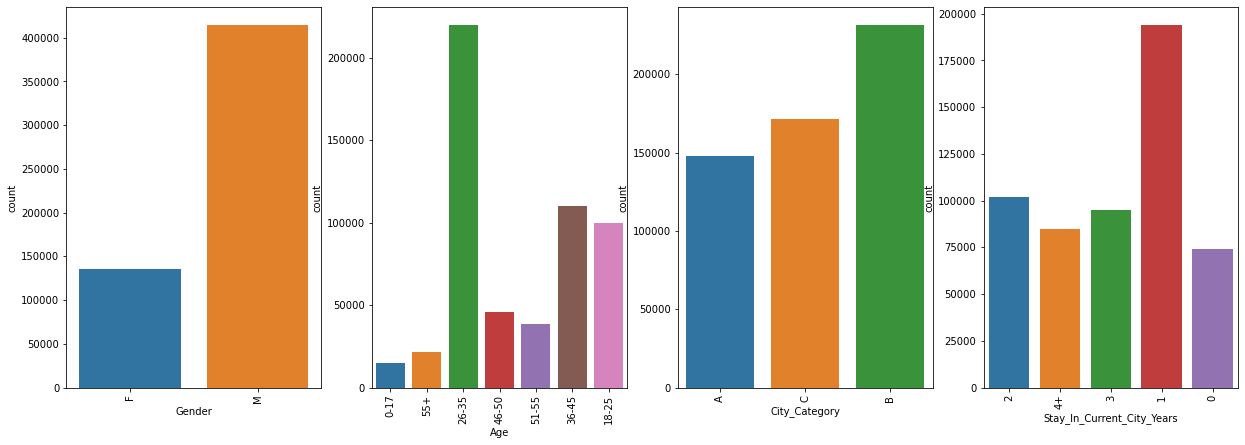

In [15]:
fig, ax=plt.subplots(1,4,figsize=(21,7))
for variable,subplot in zip(dscr_columns,ax.flatten()):
    sn.countplot(Train_Data[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

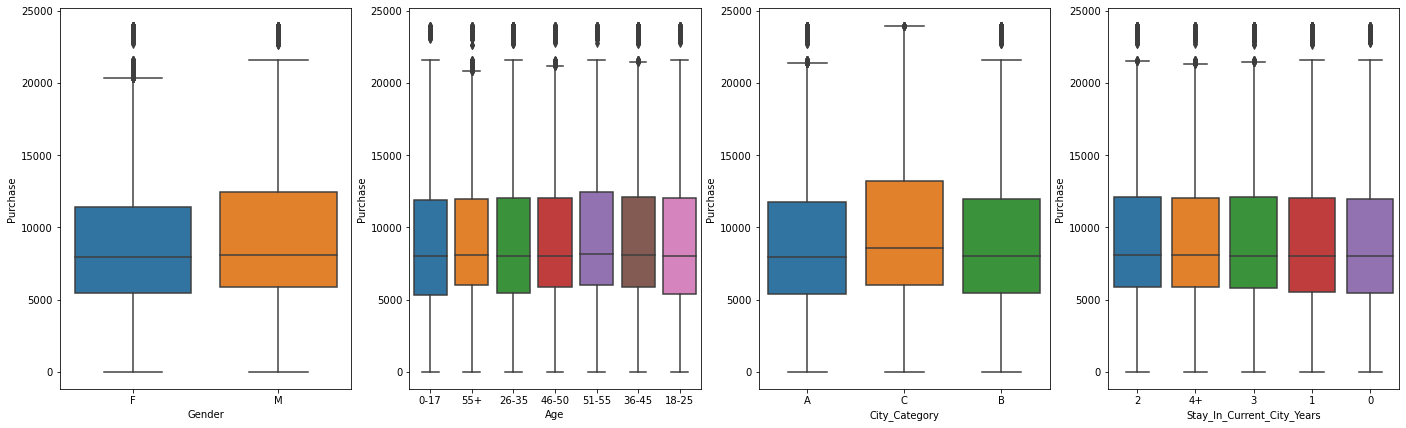

In [16]:
fig, ax= plt.subplots(1, 4, figsize=(24, 7))
for var, subplot in zip(dscr_columns, ax.flatten()):
    sn.boxplot(x=var, y='Purchase', data=Train_Data, ax=subplot)

In [17]:
cont_col=[u'Occupation',u'Product_Category_1',u'Product_Category_2',u'Product_Category_3']

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


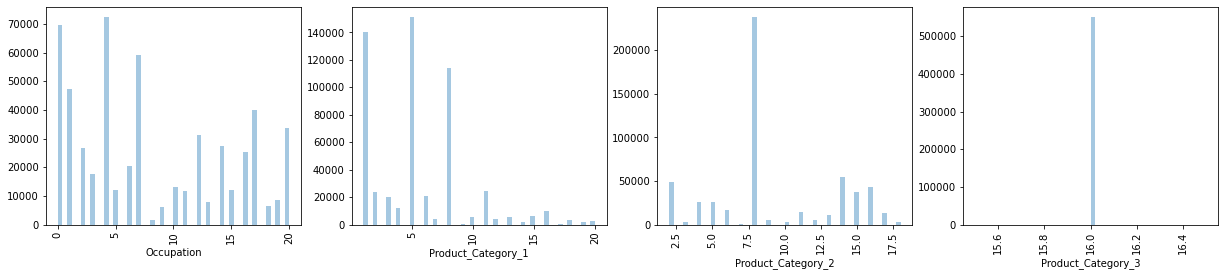

In [18]:
fig, ax=plt.subplots(1,4,figsize=(21,4))
for variable,subplot in zip(cont_col,ax.flatten()):
    sn.distplot(Train_Data[variable],ax=subplot,kde=False)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\li

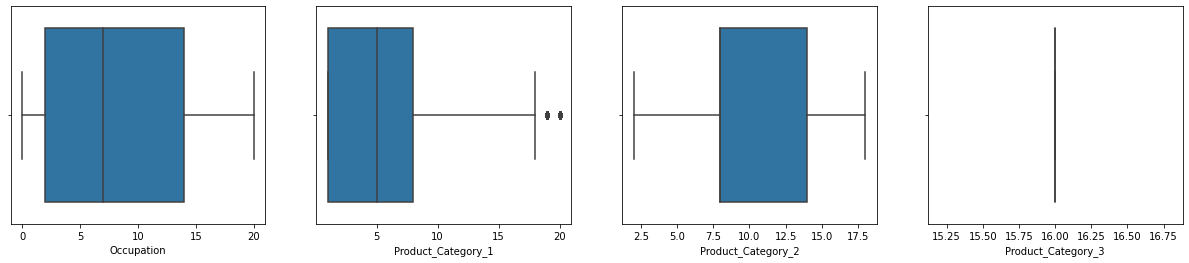

In [19]:
fig, ax= plt.subplots(1, 4, figsize=(21, 4))
for var, subplot in zip(cont_col, ax.flatten()):
    sn.boxplot(Train_Data[var], ax=subplot)

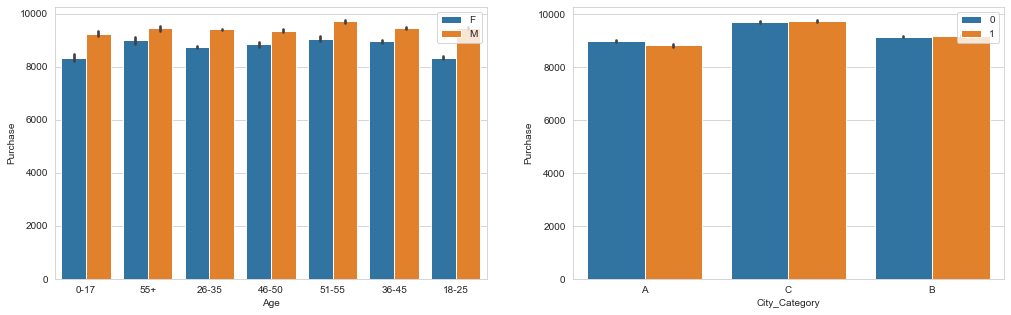

In [20]:
plt.figure(figsize=(17,5))
sn.set_style(style='whitegrid')
plt.subplot(1,2,1)
sn.barplot(x=Train_Data['Age'],y=Train_Data['Purchase'],hue=Train_Data['Gender'])
plt.legend(loc='upper right')
plt.subplot(1,2,2)
sn.barplot(x=Train_Data['City_Category'],y=Train_Data['Purchase'],hue=Train_Data['Marital_Status'])
plt.legend(loc='upper right')

In [21]:
label=LabelEncoder()
def encoder(df,variable):
  df[variable]=label.fit_transform(df[variable])

In [22]:
encoder(Train_Data,'Product_ID')
encoder(Train_Data,'Gender')
encoder(Train_Data,'Age')
encoder(Train_Data,'City_Category')
encoder(Train_Data,'Stay_In_Current_City_Years')

In [23]:
Train_Data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,672,0,0,10,0,2,0,3,8.0,16.0,8370
1,2376,0,0,10,0,2,0,1,6.0,16.0,15200
2,852,0,0,10,0,2,0,12,8.0,16.0,1422
3,828,0,0,10,0,2,0,12,14.0,16.0,1057
4,2734,1,6,16,2,4,0,8,8.0,16.0,7969


In [24]:
all_col=list(Train_Data.columns)
all_col

['Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


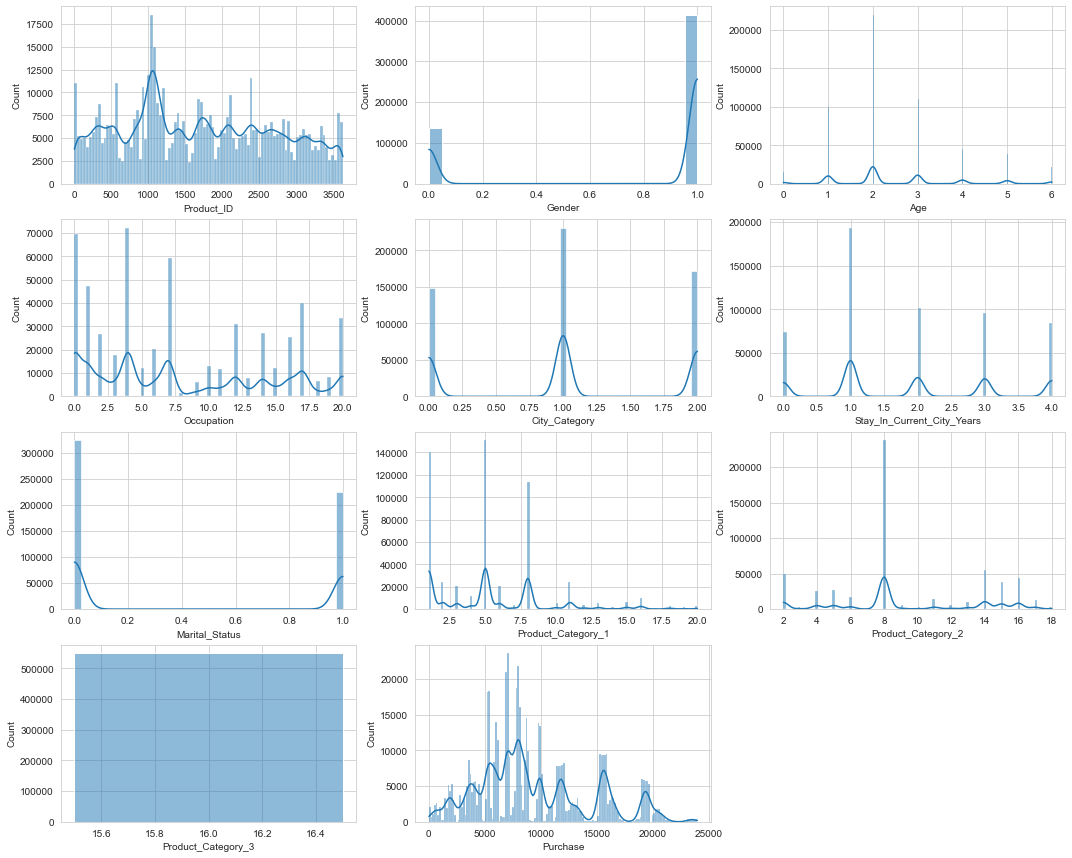

In [25]:
plt.figure(figsize=(18,15))
for i in enumerate(all_col):
  plt.subplot(4,3,i[0]+1)
  sn.histplot(Train_Data[i[1]],kde=True)

In [26]:
X=Train_Data.drop(['Purchase'],axis=1)
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,672,0,0,10,0,2,0,3,8.0,16.0
1,2376,0,0,10,0,2,0,1,6.0,16.0
2,852,0,0,10,0,2,0,12,8.0,16.0
3,828,0,0,10,0,2,0,12,14.0,16.0
4,2734,1,6,16,2,4,0,8,8.0,16.0


In [27]:
y=Train_Data['Purchase']
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [28]:
x=sm.add_constant(X)

In [29]:
m1=sm.OLS(y,x)
m1=m1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     9395.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:59:56   Log-Likelihood:            -5.4288e+06
No. Observations:              550068   AIC:                         1.086e+07
Df Residuals:                  550058   BIC:                         1.086e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Product_ID                    -0.4346      0.006    -69.489      0.000      -0.447      -0.422
Gender                       532.2037     14.745     36.093      0.000     503.303     561.104
Age                          125.2095      4.966     25.215      0.000     115.477     134.942
Occupation                     6.8049      0.978      6.956      0.000       4.887       8.722
City_Category                354.3458      8.364     42.364      0.000     337.952     370.740
Stay_In_Current_City_Years     7.4198      4.894      1.516      0.129      -2.172      17.012
Marital_Status               -49.8913     13.496     -3.697      0.000     -76.344     -23.439
Product_Category_1          -414.8369      1.678   -247.192      0.000    -418.126    -411.548
Product_Category_2           -46.5882      1.531    -30.433      0.000     -49.589     -43.588
Product_Category_3           721.7628      1.727    418.023      0.000     718.379     725.147
==============================================================================
Omnibus:                    59280.615   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82392.571
Skew:                           0.861   Prob(JB):                         0.00
Kurtosis:                       3.794   Cond. No.                     4.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
X1=x.drop(['Stay_In_Current_City_Years'],axis=1)
x1=sm.add_constant(X1)

In [31]:
m2=sm.OLS(y,x1)
m2=m2.fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                 1.057e+04
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:59:57   Log-Likelihood:            -5.4288e+06
No. Observations:              550068   AIC:                         1.086e+07
Df Residuals:                  550059   BIC:                         1.086e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Product_ID            -0.4346      0.006    -69.493      0.000      -0.447      -0.422
Gender               532.4507     14.744     36.112      0.000     503.552     561.349
Age                  125.1689      4.966     25.207      0.000     115.436     134.901
Occupation             6.8472      0.978      7.002      0.000       4.930       8.764
City_Category        354.5998      8.363     42.403      0.000     338.209     370.990
Marital_Status       -50.1311     13.495     -3.715      0.000     -76.582     -23.681
Product_Category_1  -414.8430      1.678   -247.196      0.000    -418.132    -411.554
Product_Category_2   -46.5872      1.531    -30.432      0.000     -49.588     -43.587
Product_Category_3   722.5915      1.638    441.198      0.000     719.382     725.802
==============================================================================
Omnibus:                    59278.167   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82388.116
Skew:                           0.861   Prob(JB):                         0.00
Kurtosis:                       3.794   Cond. No.                     4.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residuals vs. Predicted Value')

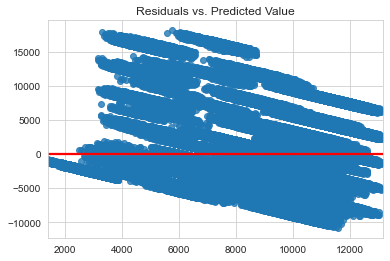

In [32]:
fitted_vals = m2.predict()
resids = m2.resid

sn.regplot(x=fitted_vals, y=resids,line_kws={'color':'red'})
plt.title('Residuals vs. Predicted Value')

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

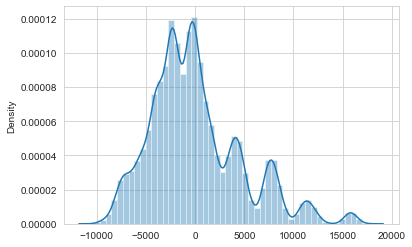

In [33]:
sn.distplot(m2.resid)

((array([-4.70648688, -4.52228984, -4.42257089, ...,  4.42257089,
          4.52228984,  4.70648688]),
  array([-10838.75897235, -10747.10793991, -10668.06747154, ...,
          17883.8971116 ,  17898.08776985,  18147.90227251])),
 (4566.614591178045, -2.3390198970379977e-10, 0.9764977026710213))

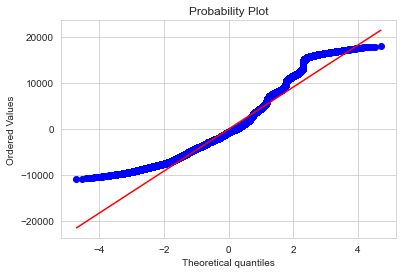

In [34]:
stats.probplot(resids, plot=sn.mpl.pyplot)

In [35]:
resids_standardized = m1.get_influence().resid_studentized_internal

<AxesSubplot:>

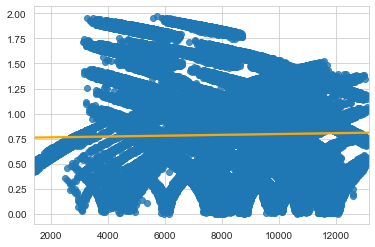

In [36]:
sn.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)),line_kws={'color':'orange'})

In [37]:
for column in x1.columns:
    corr_test = pearsonr(x1[column], m1.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: Product_ID --- correlation: -0.0000, p-value: 1.0000
Variable: Gender --- correlation: 0.0000, p-value: 1.0000
Variable: Age --- correlation: -0.0000, p-value: 1.0000
Variable: Occupation --- correlation: 0.0000, p-value: 1.0000
Variable: City_Category --- correlation: -0.0000, p-value: 1.0000
Variable: Marital_Status --- correlation: -0.0000, p-value: 1.0000
Variable: Product_Category_1 --- correlation: 0.0000, p-value: 1.0000
Variable: Product_Category_2 --- correlation: 0.0000, p-value: 1.0000
Variable: Product_Category_3 --- correlation: nan, p-value: nan


C:\Users\Ruchit\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [38]:
vif1= [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
pd.DataFrame(vif1[1:],index=x1.columns[1:])

,0
Gender,1.016699
Age,1.136356
Occupation,1.023402
City_Category,1.016530
Marital_Status,1.107819
Product_Category_1,1.097514
Product_Category_2,1.086882
Product_Category_3,17.271459


# **Prediction With LinearRegression**

In [39]:
X=x1.iloc[:,1:]
X.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,0,3,8.0,16.0
1,0,0,10,0,0,1,6.0,16.0
2,0,0,10,0,0,12,8.0,16.0
3,0,0,10,0,0,12,14.0,16.0
4,1,6,16,2,0,8,8.0,16.0


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
lr=LinearRegression(normalize=True)

In [42]:
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [43]:
lr.score(x_train,y_train)

0.13409708710774393

In [44]:
lr.coef_

array([-4.34218914e-01,  5.23375951e+02,  1.21748650e+02,  6.60405516e+00,
        3.52301607e+02,  6.96392917e+00, -5.80075801e+01, -4.17663350e+02,
       -4.48842468e+01,  0.00000000e+00])

In [45]:
lr.intercept_

11568.433404036703

In [46]:
y_train

500304     3886
16861     12148
113230     8054
434978     4000
385516    13701
          ...  
110268     1862
259178     8623
365838     6954
131932     6151
121958     7146
Name: Purchase, Length: 385047, dtype: int64

In [47]:
y_pred=lr.predict(x_test)
y_pred

array([11579.90663322, 10292.02504287,  7409.98067245, ...,
       10712.8751502 , 10307.61276936,  8664.21503848])

In [48]:
lr.score(x_test,y_test)*100

13.120217849214399

In [49]:
r2_score(y_test,y_pred)

0.131202178492144

In [50]:
lr.score(x_test,y_test)

0.131202178492144

In [51]:
R=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
R

,Actual,Predicted
84432,19142,11579.906633
72724,15513,10292.025043
197032,7802,7409.980672
353704,15455,11099.595497
91198,4492,9718.103160
...,...,...
284287,1840,9607.316937
50876,4050,7571.943943
533433,11836,10712.875150
44339,9548,10307.612769


# **Prediction With DecisionTreeRegressor**

In [52]:
dtr=DecisionTreeRegressor(random_state=0)

In [53]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [54]:
y_pred=dtr.predict(x_test)

In [55]:
r2_score(y_test,y_pred)*100

44.7289905898141

In [56]:
dtr.score(x_train,y_train)*100

97.03071361029218

# **ANN**

In [57]:
model=Sequential()
model.add(tensorflow.keras.layers.InputLayer(input_shape=(10,)))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                2

In [58]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','accuracy'])

In [59]:
history2=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
12033/12033 [==============================] - 46s 3ms/step - loss: 24037154.0000 - mae: 3548.0862 - accuracy: 0.0000e+00 - val_loss: 95894688.0000 - val_mae: 3330.6714 - val_accuracy: 0.0000e+00
Epoch 2/20
12033/12033 [==============================] - 35s 3ms/step - loss: 18092602.0000 - mae: 3139.1084 - accuracy: 0.0000e+00 - val_loss: 17553100.0000 - val_mae: 3073.3804 - val_accuracy: 0.0000e+00
Epoch 3/20
12033/12033 [==============================] - 35s 3ms/step - loss: 17879702.0000 - mae: 3114.3711 - accuracy: 0.0000e+00 - val_loss: 20367966.0000 - val_mae: 3145.3733 - val_accuracy: 0.0000e+00
Epoch 4/20
12033/12033 [==============================] - 35s 3ms/step - loss: 17770802.0000 - mae: 3110.8262 - accuracy: 0.0000e+00 - val_loss: 17593410.0000 - val_mae: 3053.4019 - val_accuracy: 0.0000e+00
Epoch 5/20
12033/12033 [==============================] - 35s 3ms/step - loss: 17598960.0000 - mae: 3102.3738 - accuracy: 0.0000e+00 - val_loss: 18607892.0000 - val_mae: 30

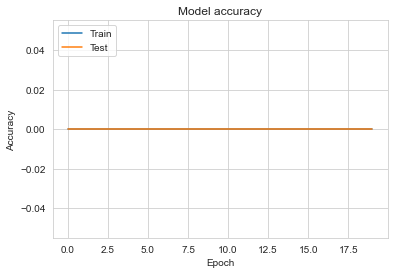

In [60]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

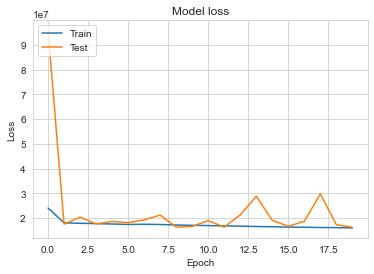

In [61]:
plt.plot(history2.history['loss']) 
plt.plot(history2.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# **Test Data**

In [62]:
Test_Data=pd.read_csv('C:/Users/Ruchit/Project/project-1/project1/TEST1/test.csv')
Test_Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# **Data Cleaning**

In [63]:
Test_Data.shape

(233599, 11)

In [64]:
Test_Data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [65]:
Test_Data.dropna(inplace=True,axis=0)
Test_Data.drop(labels='User_ID',axis=1,inplace=True)
Test_Data.reset_index(drop=True,inplace=True)

In [66]:
Test_Data.shape

(71037, 10)

In [67]:
encoder(Test_Data,'Product_ID')
encoder(Test_Data,'Gender')
encoder(Test_Data,'Age')
encoder(Test_Data,'City_Category')
encoder(Test_Data,'Stay_In_Current_City_Years')

In [68]:
Test_Data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,81,0,2,1,2,1,0,4,5.0,12.0
1,483,1,4,1,2,3,1,2,3.0,15.0
2,234,1,4,1,2,3,1,1,11.0,15.0
3,506,1,4,1,2,3,1,2,4.0,9.0
4,247,1,2,7,0,1,0,10,13.0,16.0


# **Prediction With DecisionTreeRegressor**

In [69]:
test_pred=dtr.predict(Test_Data)

In [70]:
dtr.score(Test_Data,test_pred)

1.0